In [1]:
# Assignment on Classification technique 
# Every year many students give the GRE exam to get admission in foreign Universities. The 
# data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating 
# (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out 
# of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 
# 1=yes). Admitted is the target variable.  
# Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions 
# The counselor of the firm is supposed check whether the student will get an admission or not 
# based on his/her GRE score and Academic Score. So to help the counselor to take appropriate 
# decisions build a machine learning model classifier using Decision tree to predict whether a 
# student will get admission or not. 
# a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if 
# necessary.  
# b) Perform data-preparation (Train-Test Split) 
# c) Apply Machine Learning Algorithm 
# d) Evaluate Model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Admission_Predict.csv")

In [4]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
dataset.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
print(dataset.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [11]:
# Create the 'Admitted' column based on 'Chance of Admit'
dataset['Admitted'] = (dataset['Chance of Admit '] > 0.65).astype(int)

In [13]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Admitted           400 non-null    int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 29.8 KB


In [15]:
dataset.describe

<bound method NDFrame.describe of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Ch

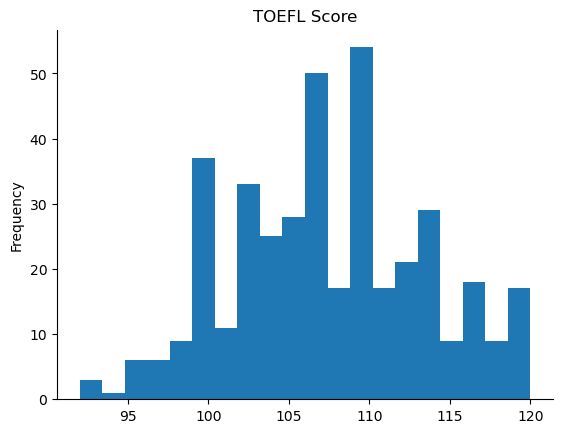

In [17]:
dataset['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

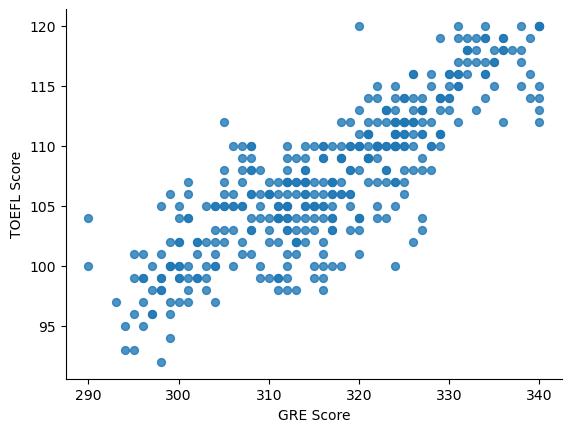

In [18]:
dataset.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [21]:
label_encoder = LabelEncoder()
dataset['Research'] = label_encoder.fit_transform(dataset['Research'])

In [22]:
x = dataset[['GRE Score','CGPA']]
y = dataset['Admitted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


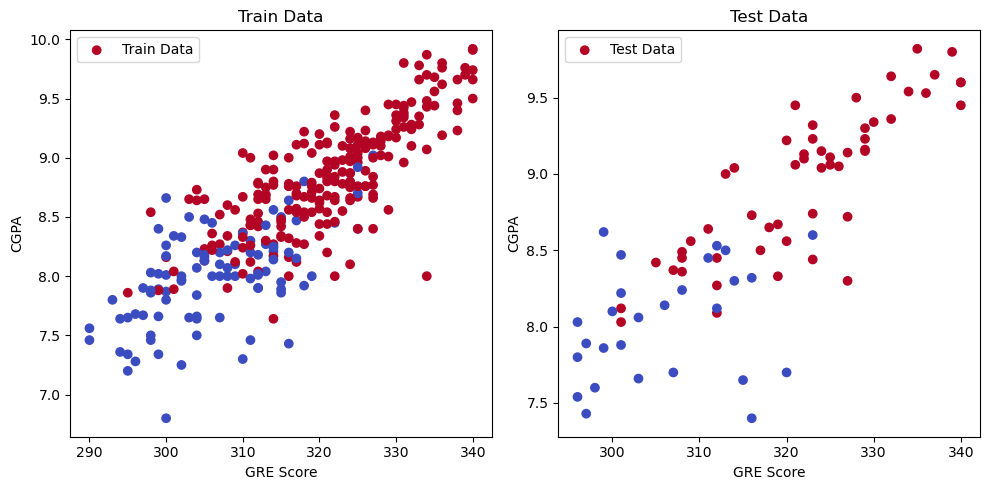

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train['GRE Score'], x_train['CGPA'], c=y_train, cmap='coolwarm', marker='o', label='Train Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['GRE Score'], x_test['CGPA'], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Test Data')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
model= DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [25]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

In [26]:
from sklearn import metrics
from sklearn.tree import plot_tree

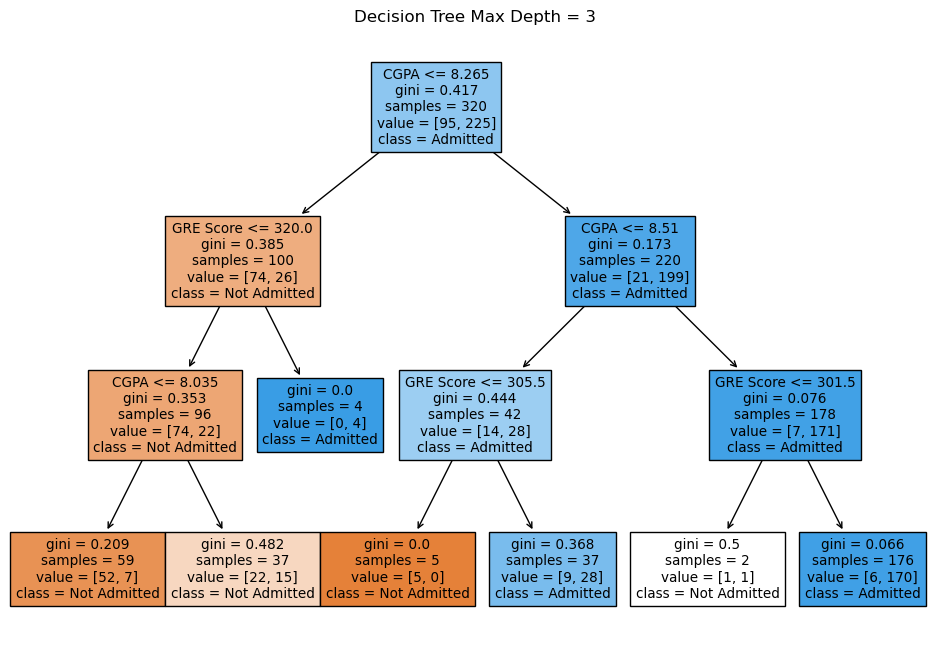

In [27]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()

In [28]:
print("Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Model Evaluation:
Accuracy: 0.875
Precision: 0.8909090909090909
Recall: 0.9245283018867925
F1 Score: 0.9074074074074073


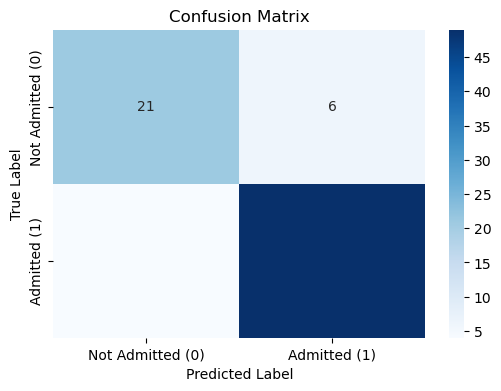

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Admitted (0)', 'Admitted (1)'], 
            yticklabels=['Not Admitted (0)', 'Admitted (1)'])

# Labels, Title, and Formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
